# iPhone Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df = pd.read_csv("../Data/apple_products.csv")
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [53]:
print(df)

                                Product Name  \
0          APPLE iPhone 8 Plus (Gold, 64 GB)   
1   APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2       APPLE iPhone 8 Plus (Silver, 256 GB)   
3            APPLE iPhone 8 (Silver, 256 GB)   
4              APPLE iPhone 8 (Gold, 256 GB)   
..                                       ...   
57            APPLE iPhone SE (Black, 64 GB)   
58           APPLE iPhone 11 (Purple, 64 GB)   
59            APPLE iPhone 11 (White, 64 GB)   
60            APPLE iPhone 11 (Black, 64 GB)   
61              APPLE iPhone 11 (Red, 64 GB)   

                                          Product URL  Brand  Sale Price  \
0   https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1   https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2   https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3   https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4   https://www.flipkart.com/apple-iphone-8

In [3]:
df.shape

(62, 11)

In [4]:
df.columns

Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

In [7]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [12]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


### 1) What are the top 10 highest-rated iPhones on Flipkart in India?

In [34]:
highest_rated = df.sort_values(by = ["Star Rating"], ascending= False).head(10)
highest_rated["Product Name"]

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object

### 2) How many ratings do the highest-rated iPhones on Flipkart have?

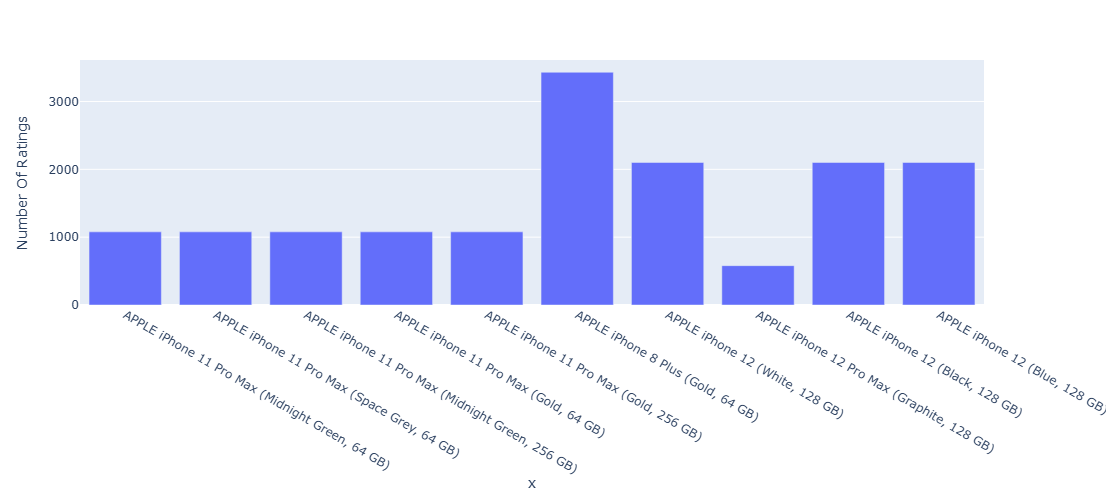

In [41]:
Top10_iPhones = highest_rated["Product Name"].value_counts()
label = Top10_iPhones.index
counts = highest_rated["Number Of Ratings"]
figure = px.bar(highest_rated, x= label, y=counts, height=500)
figure.show()

### 3) Which iPhone has the highest number of reviews on Flipkart?

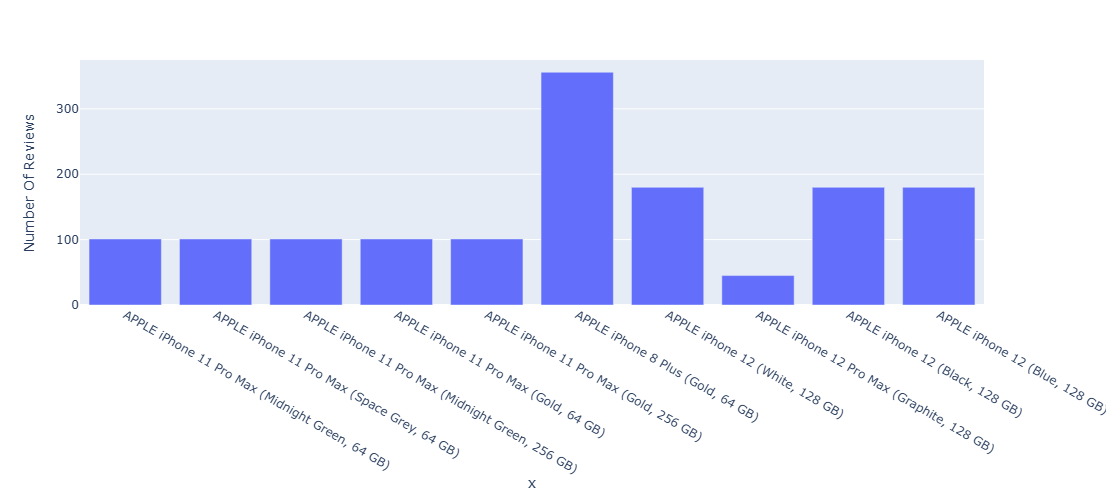

In [42]:
Top10_iPhones = highest_rated["Product Name"].value_counts()
label = Top10_iPhones.index
counts = highest_rated["Number Of Reviews"]
figure = px.bar(highest_rated, x= label, y=counts, height=500)
figure.show()

### 4) What is the relationship between the sale price of iPhones and the number of ratings on Flipkart?

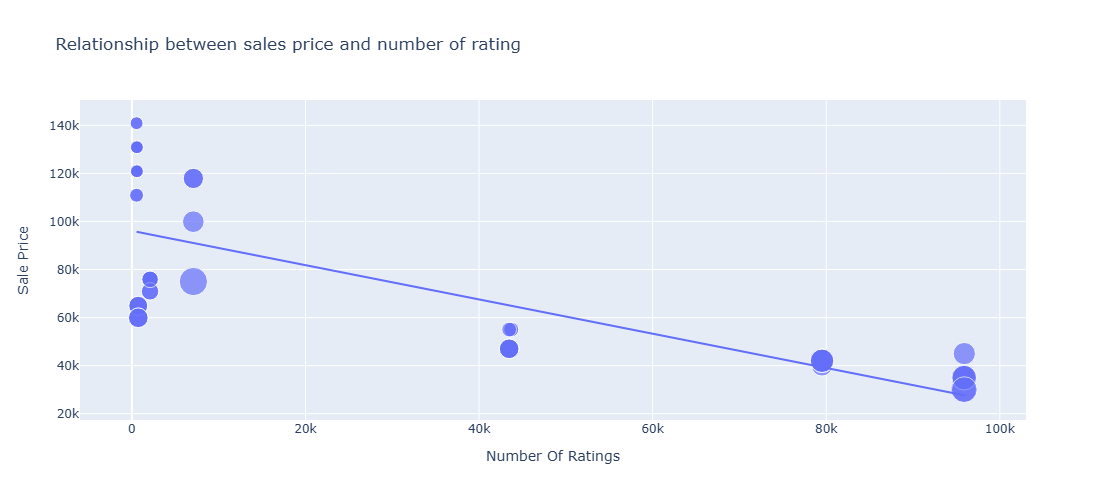

In [45]:
figure = px.scatter(data_frame=df, x = "Number Of Ratings", y = "Sale Price", size= "Discount Percentage", trendline= "ols", 
                    title= "Relationship between sales price and number of rating",height=500)
figure.show()

*There is a negative linear relationship between the sales price of the iPhone and the number of ratings. It means iPhones with lower sale prices and sold more in india.*

### 5) What is the relationship between the discount percentage and the number of ratings of iPhones on Flipkart?

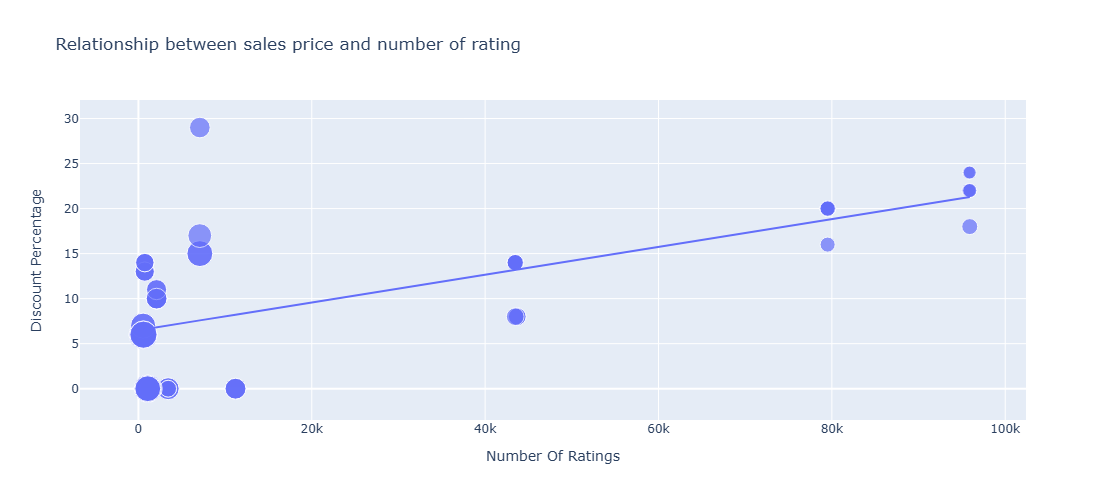

In [46]:
figure = px.scatter(data_frame=df, x = "Number Of Ratings", y = "Discount Percentage", size= "Sale Price", trendline= "ols", 
                    title= "Relationship between sales price and number of rating",height=500)
figure.show()

### 6) Can you figure out the least expensive and most expensive iPhones in the Indian market, along with all their specifications?

In [56]:
most_expensive = df.loc[df["Sale Price"].idxmax()]
least_expensive = df.loc[df["Sale Price"].idxmin()]

print("Most Expensive Product :")
print(most_expensive)

print("\nLeast Expensive Product :")
print(least_expensive)

Most Expensive Product :
Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
Name: 24, dtype: object

Least Expensive Product :
Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/

***